# Compatrison between stochastic gradient descent and gradient descent


In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
import time

x_train, y_train = make_regression(
    n_samples=2000,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=1,
    random_state=10,
)
x_test, y_test = make_regression(
    n_samples=2000, n_features=1, n_informative=1, n_targets=1, noise=1, random_state=10
)

Text(0.5, 1.0, 'Train data')

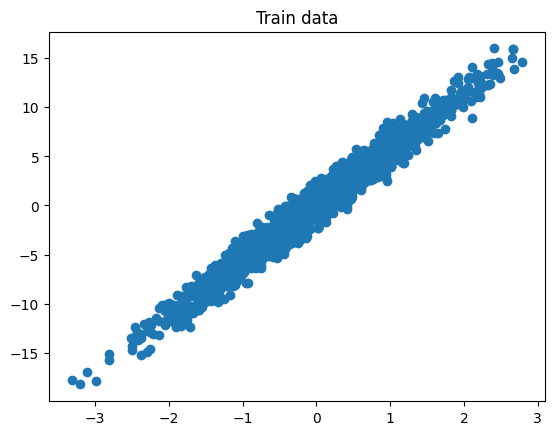

In [105]:
plt.scatter(x=x_train, y=y_train)
plt.title("Train data")

Text(0.5, 1.0, 'test data')

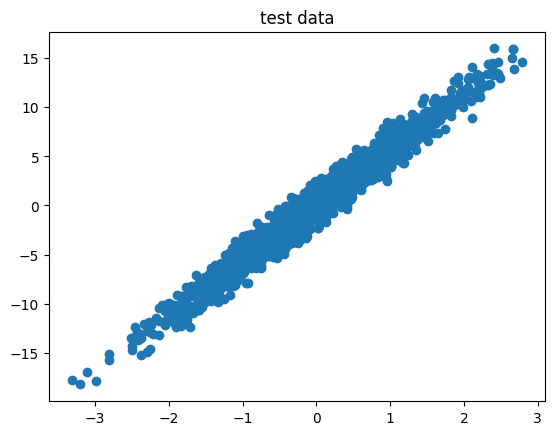

In [106]:
plt.scatter(x=x_test, y=y_test)
plt.title("test data")

# gradient descent


In [111]:
def cost_compute(x, y, w, b):

    cost_i, total_cost, n = 0, 0, len(x)

    for i in range(n):
        cost_i = ((w * x[i] + b) - y[i]) ** 2
        total_cost += cost_i

    total_cost = total_cost * (1 / (2 * n))

    return total_cost


def calculate_predicted_values(x_train, w, b):
    m = len(x_train)
    f_wb = [0] * m

    for i in range(m):
        f_wb[i] = w * x_train[i] + b
    return f_wb


def compute_gredient(x, y, w, b):  # just derivative part

    n = len(x)

    d_dw, d_db = 0, 0

    for i in range(n):
        f_wb = w * x[i] + b

        d_dw_i = (f_wb - y[i]) * x[i]
        d_db_i = f_wb - y[i]

        d_dw += d_dw_i
        d_db += d_db_i

    d_db /= n
    d_dw /= n
    return d_dw, d_db


def grediant_descent(x, y, w_int, b_int, alpha, iterations):

    w = w_int
    b = b_int

    for i in range(iterations + 1):

        di_dw, di_db = compute_gredient(x, y, w, b)

        b = b - alpha * di_db
        w = w - alpha * di_dw

        if i % 100 == 0:
            cost = cost_compute(x, y, w, b)
            print(
                f"iteration {i}:  cost {cost}:  w {w}:   b {b}:  d_dw {di_dw}:    d_db {di_db}"
            )

    return w, b

In [108]:
start_time = time.time()

w_init, b_init, iterations, temp_alpha = 0, 0, 1000, 1.0e-2

w_final, b_final = grediant_descent(
    x_train, y_train, w_init, b_init, temp_alpha, iterations
)


print("final w = ", w_final)
print("final b = ", b_final)


end_time = time.time()

print("Time of algorithm = ", end_time - start_time)

iteration 0:  cost [15.22097736]:  w [0.05296127]:   b [-0.00070998]:  d_dw [-5.29612659]:    d_db [0.07099817]
iteration 100:  cost [2.74817342]:  w [3.47110401]:   b [-0.02670853]:  d_dw [-2.07021876]:    d_db [4.18090528e-05]
iteration 200:  cost [0.84223104]:  w [4.80732918]:   b [-0.01947869]:  d_dw [-0.80936977]:    d_db [-0.0101276]
iteration 300:  cost [0.55080131]:  w [5.32977341]:   b [-0.01028536]:  d_dw [-0.31647975]:    d_db [-0.0076728]
iteration 400:  cost [0.50621498]:  w [5.53407255]:   b [-0.00436034]:  d_dw [-0.12376809]:    d_db [-0.0043593]
iteration 500:  cost [0.49939029]:  w [5.61397411]:   b [-0.00119045]:  d_dw [-0.04840957]:    d_db [-0.00220217]
iteration 600:  cost [0.4983452]:  w [5.64522784]:   b [0.0003614]:  d_dw [-0.01893693]:    d_db [-0.00104331]
iteration 700:  cost [0.49818511]:  w [5.65745436]:   b [0.0010826]:  d_dw [-0.00740867]:    d_db [-0.0004747]
iteration 800:  cost [0.49816057]:  w [5.66223796]:   b [0.00140651]:  d_dw [-0.00289881]:    d_

#### Algorithm Time 6.830838441848755


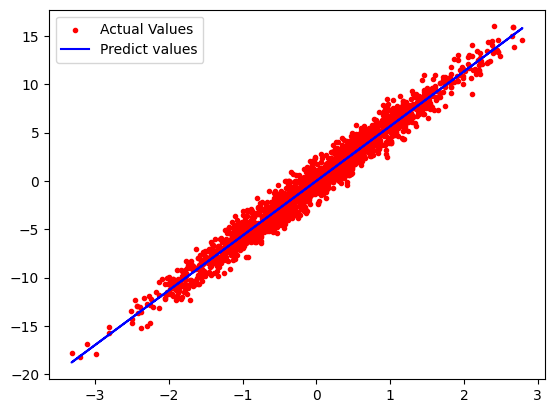

In [109]:
f_wb = calculate_predicted_values(x_train, w_final, b_final)

plt.scatter(x=x_train, y=y_train, color="red", marker=".", label="Actual Values")

plt.plot(x_train, f_wb, color="blue", label="Predict values")

plt.legend()
plt.show()

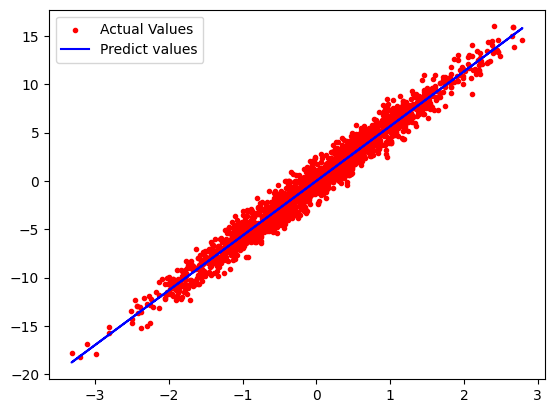

In [110]:
test_prediction = calculate_predicted_values(x_test, w_final, b_final)

plt.scatter(x=x_test, y=y_test, color="red", marker=".", label="Actual Values")

plt.plot(x_test, test_prediction, color="blue", label="Predict values")

plt.legend()
plt.show()

# stochastic gradient descent


In [116]:
def calculate_predicted_values(x_train, w, b):
    m = len(x_train)
    f_wb = [0] * m

    for i in range(m):
        f_wb[i] = w * x_train[i] + b
    return f_wb


def cost_compute(x, y, w, b):

    cost_i, total_cost, n = 0, 0, len(x)

    for i in range(n):
        cost_i = ((w * x[i] + b) - y[i]) ** 2
        total_cost += cost_i

    total_cost = total_cost * (1 / (2 * n))

    return total_cost


def compute_gredient(x, y, w, b, rand_index):  # just derivative part

    n = len(x)

    d_dw, d_db = 0, 0

    f_wb = w * x + b

    d_dw_i = (f_wb - y) * x
    d_db_i = f_wb - y

    d_dw += d_dw_i
    d_db += d_db_i

    d_db /= n
    d_dw /= n
    return d_dw, d_db


def grediant_descent(x, y, w_int, b_int, alpha, iterations):

    w = w_int
    b = b_int

    for i in range(iterations + 1):
        rand_index = np.random.randint(0, len(x))

        di_dw, di_db = compute_gredient(x[rand_index], y[rand_index], w, b, rand_index)

        b = b - alpha * di_db
        w = w - alpha * di_dw

        if i % 1000 == 0:
            cost = cost_compute(x, y, w, b)
            print(
                f"iteration {i}:  cost {cost}:  w {w}:   b {b}:  d_dw {di_dw}:    d_db {di_db}"
            )

    return w, b

In [117]:
start_time = time.time()

w_init, b_init, iterations, temp_alpha = 0, 0, 10000, 1.0e-2

w_final, b_final = grediant_descent(
    x_train, y_train, w_init, b_init, temp_alpha, iterations
)


print("final w = ", w_final)
print("final b = ", b_final)


end_time = time.time()

print("Time of algorithm = ", end_time - start_time)

iteration 0:  cost [15.42348479]:  w [0.01421462]:   b [-0.02666391]:  d_dw [-1.42146234]:    d_db [2.6663913]
iteration 1000:  cost [0.50577287]:  w [5.71508765]:   b [0.11594919]:  d_dw [-0.06223975]:    d_db [0.28842756]
iteration 2000:  cost [0.50141577]:  w [5.70588902]:   b [0.07274687]:  d_dw [-0.14009272]:    d_db [0.29453202]
iteration 3000:  cost [0.50027844]:  w [5.67217865]:   b [0.06655404]:  d_dw [0.25710389]:    d_db [0.62565066]
iteration 4000:  cost [0.50322578]:  w [5.73572588]:   b [0.07675464]:  d_dw [0.01805592]:    d_db [-0.03460471]
iteration 5000:  cost [0.50595627]:  w [5.70077403]:   b [-0.1179949]:  d_dw [2.22353126]:    d_db [-1.71225027]
iteration 6000:  cost [0.50587089]:  w [5.54730836]:   b [-0.04899189]:  d_dw [0.13495103]:    d_db [0.90315213]
iteration 7000:  cost [0.5004981]:  w [5.68010124]:   b [0.06877332]:  d_dw [0.05643865]:    d_db [0.09353989]
iteration 8000:  cost [0.49821571]:  w [5.65412568]:   b [0.00298174]:  d_dw [-0.28527782]:    d_db [

#### Algorithm Time 0.14721894264221191


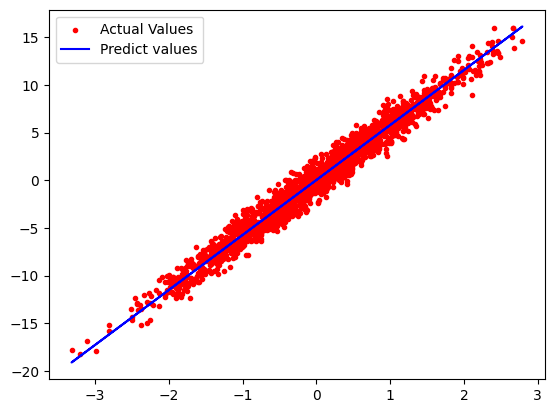

In [118]:
f_wb = calculate_predicted_values(x_train, w_final, b_final)

plt.scatter(x=x_train, y=y_train, color="red", marker=".", label="Actual Values")

plt.plot(x_train, f_wb, color="blue", label="Predict values")

plt.legend()
plt.show()

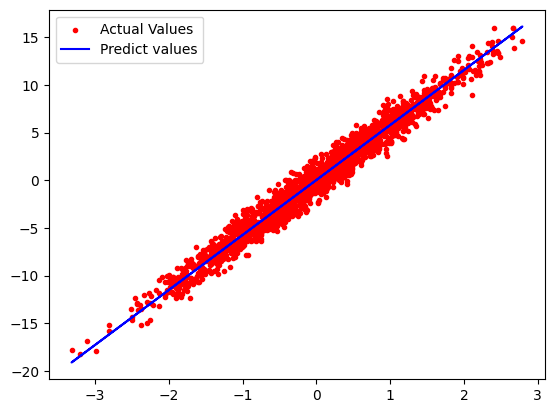

In [119]:
test_prediction = calculate_predicted_values(x_test, w_final, b_final)

plt.scatter(x=x_test, y=y_test, color="red", marker=".", label="Actual Values")

plt.plot(x_test, test_prediction, color="blue", label="Predict values")

plt.legend()
plt.show()

## overview

as you see SGD save about 7 secondes and get same result, in additional that SGD has 10000 iteration, but gradient descent has only 1000 iteration
